# Classification Models Comparisons

in this notebook we will use different kinds of Image classification models and compare them on the given categories. 
The first one will be looking at is accuracy and Loss because they're our prioties during this training and also the time it takes to predict the image. 

1. Setup
2. Data preparation (data spliting and labeling), and Exploration
3. Building Model
    - Residual Network https://paperswithcode.com/method/resnet  
    https://tfhub.dev/google/supcon/resnet_v1_200/imagenet/classification/1
    
    - VGG-16 https://paperswithcode.com/method/vgg-16  
    https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16

    - Alex Net https://paperswithcode.com/method/alexnet   
    https://medium.com/swlh/alexnet-with-tensorflow-46f366559ce8

    - Dense Net https://paperswithcode.com/method/densenet  
    https://www.tensorflow.org/api_docs/python/tf/keras/applications/densenet
    
4. Ensemble Approaches 
https://www.tensorflow.org/tutorials/images/classification
https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams

5. Comparisons
6. Results


## 1. Setup
This Python 3 environment comes with many helpful analytics libraries installed  
It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python  
For example, here's several helpful packages to load.   
In this stage we will use this data set https://paperswithcode.com/dataset/tiny-imagenet. 
 
Enable Cuda For fast training 


In [1]:
# Remved warnings 
import warnings  
warnings.filterwarnings('ignore')

# This packages are used for file handling
import os
import os.path
import random 
import pickle 
from tqdm import tqdm
from datetime import datetime

# Used for plotting and visualizations
%matplotlib inline 
import seaborn as sns 
import matplotlib.pyplot as plt 

# For linear algebra and arrays manipulation 
import cv2 
import math
import random 
import pandas as pd
import numpy as np
from numpy import save, load, asarray


# Building machine learning model 
import keras
import tensorflow as tf 
import tensorflow_hub as hub
from tensorflow.keras.models import Model
from tensorflow.compat.v1 import ConfigProto, InteractiveSession
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import losses
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut,KFold
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import mobilenet_v2, mobilenet, densenet
from tensorflow.keras.layers import (Dense, MaxPooling2D, Conv2D, Flatten, BatchNormalization, Activation, GlobalAveragePooling2D, 
    DepthwiseConv2D, Dropout, ReLU, Concatenate, DepthwiseConv2D, Input, add,  Conv2DTranspose)


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

# Config variables
from config import * 

In [2]:
# Initialize CUDA
config = ConfigProto()

config.gpu_options.per_process_gpu_memory_fraction = 2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
alex_net = pd.read_csv('nihogalog_logs_alexnet-sigmoid-final.csv')
resnet = pd.read_csv('nihogalog_logs_resnet.csv')
vgg = pd.read_csv('nihogalog_logs_vgg16.csv')

alex_net_model =  tf.keras.models.load_model('save-models/alexnet-sigmoid-final')
vgg_model =  tf.keras.models.load_model('save-models/vgg16')
resnet_model =  tf.keras.models.load_model('save-models/resnet50')

In [5]:
alex_net.tail()

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy,lr,_timestamp,_runtime
95,95,0.031820,0.989277,0.066914,0.979538,0.000999,1649046587,6910
96,96,0.030288,0.989803,0.065553,0.978731,0.000999,1649046625,6948
97,97,0.036748,0.987698,0.445810,0.885239,0.000999,1649046662,6985
98,98,0.044936,0.985428,0.067894,0.979000,0.000999,1649046701,7024
99,99,0.043245,0.984935,0.065910,0.979202,0.000999,1649046739,7062


In [6]:
resnet.tail()

,epoch,accuracy,loss,val_accuracy,val_loss
77,77,0.923555,0.257609,0.941105,0.197162
78,78,0.925200,0.250050,0.929394,0.230109
79,79,0.929575,0.232486,0.909538,0.299307
80,80,0.925792,0.241631,0.930538,0.229597
81,81,0.929048,0.240059,0.926028,0.235321


In [93]:
vgg.tail()

,epoch,accuracy,loss,val_accuracy,val_loss
95,95,0.976284,0.070210,0.973346,0.089312
96,96,0.977435,0.065413,0.972875,0.088716
97,97,0.976876,0.069505,0.973077,0.086908
98,98,0.978290,0.066222,0.976644,0.070934
99,99,0.975724,0.070065,0.975904,0.078131


(0.0, 1.0)

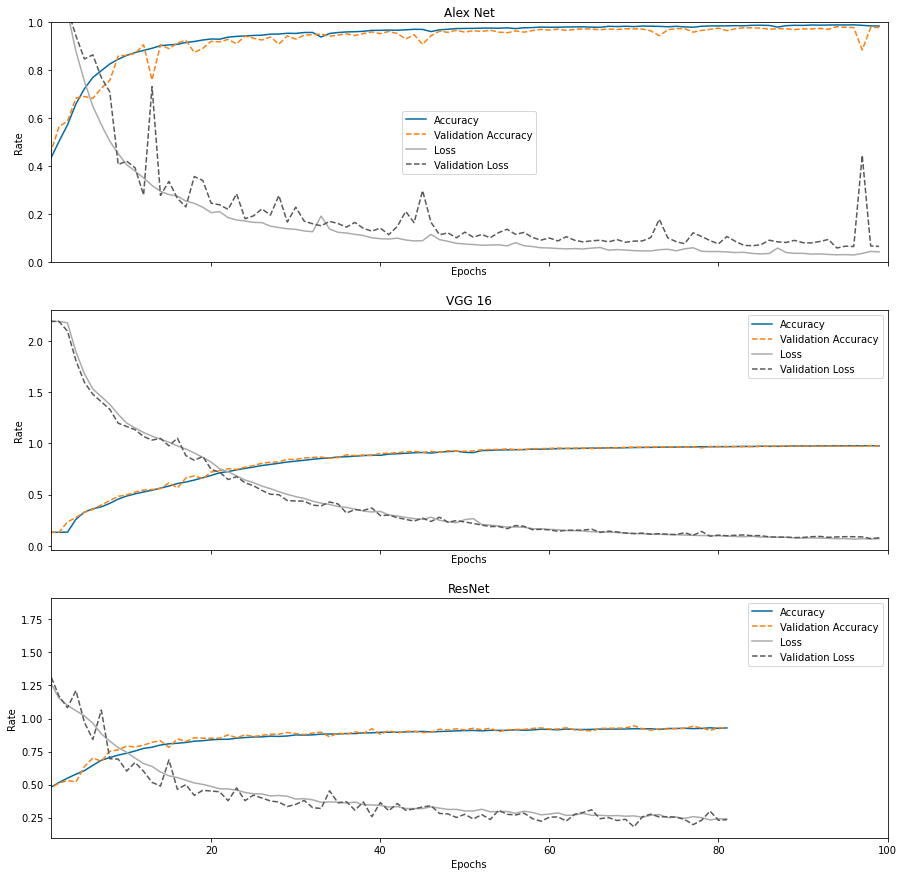

In [7]:
# Customizing the Y and X axis  
plt.style.use('tableau-colorblind10')
fig, (ax0, ax1,ax2) = plt.subplots( nrows=3, ncols=1, figsize=(15,15) , sharex=True)

plot1 = ax0.plot(alex_net['accuracy']) 
ax0.plot(alex_net['val_accuracy'], linestyle='--')
ax0.plot(alex_net['loss'])
ax0.plot(alex_net['val_loss'], linestyle='--')
ax0.set(
    title='Alex Net',
    xlabel='Epochs',
    ylabel='Rate',
)
ax0.legend(['Accuracy','Validation Accuracy','Loss','Validation Loss'])



plot2 = ax1.plot(vgg['accuracy']) 
ax1.plot(vgg['val_accuracy'], linestyle='--')
ax1.plot(vgg['loss'])
ax1.plot(vgg['val_loss'], linestyle='--')
ax1.set(
    title='VGG 16',
    xlabel='Epochs',
    ylabel='Rate',
)
ax1.legend(['Accuracy','Validation Accuracy','Loss','Validation Loss'])

plot2 = ax2.plot(resnet['accuracy']) 
ax2.plot(resnet['val_accuracy'], linestyle='--')
ax2.plot(resnet['loss'])
ax2.plot(resnet['val_loss'], linestyle='--')
ax2.set(
    title='ResNet',
    xlabel='Epochs',
    ylabel='Rate',
)
ax2.legend(['Accuracy','Validation Accuracy','Loss','Validation Loss'])
ax0.set_xlim([1, 100])
ax0.set_ylim([0, 1])

In [8]:
TEST_DATA_SET = 'data/testing'
X,y = [],[]
for idx in range(len(CATEGORIES)):
    path = os.path.join(TEST_DATA_SET, str(idx))
    for img in tqdm(os.listdir(path)):  
        full_path = os.path.join(path,img )
        img = tf.keras.preprocessing.image.load_img(full_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_tensor = tf.keras.preprocessing.image.img_to_array(img) 
        img_tensor /= 255. 
        X.append(img_tensor)
        y.append(idx)
        
        
X = np.array(X)
y = np.array(y)
y = tf.keras.utils.to_categorical(y)
X.shape, y.shape

100%|██████████| 1663/1663 [00:00<00:00, 1970.38it/s]


((14857, 50, 50, 3), (14857, 9))

In [9]:
print(alex_net_model.evaluate(X,y))
print(vgg_model.evaluate(X,y))
print(resnet_model.evaluate(X,y))

465/465 [==============================] - 10s 9ms/step - loss: 0.0624 - accuracy: 0.9797
[0.062411122024059296, 0.979672908782959]
465/465 [==============================] - 11s 20ms/step - loss: 0.2406 - accuracy: 0.9315
[0.24055851995944977, 0.9314801096916199]
465/465 [==============================] - 9s 19ms/step - loss: 0.1836 - accuracy: 0.9427
[0.18357250094413757, 0.9426532983779907]


In [13]:
%timeit (alex_net_model.evaluate(X,y))

465/465 [==============================] - 4s 9ms/step - loss: 0.0624 - accuracy: 0.9797
4.44 s ± 140 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%timeit (vgg_model.evaluate(X,y))

465/465 [==============================] - 9s 19ms/step - loss: 0.2406 - accuracy: 0.9315
9.45 s ± 98.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit (resnet_model.evaluate(X,y))

465/465 [==============================] - 10s 20ms/step - loss: 0.1836 - accuracy: 0.9427
9.89 s ± 286 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
resnet_pred = resnet_model.predict(X)
vgg_pred = vgg_model.predict(X)
alex_net = alex_net_model.predict(X)

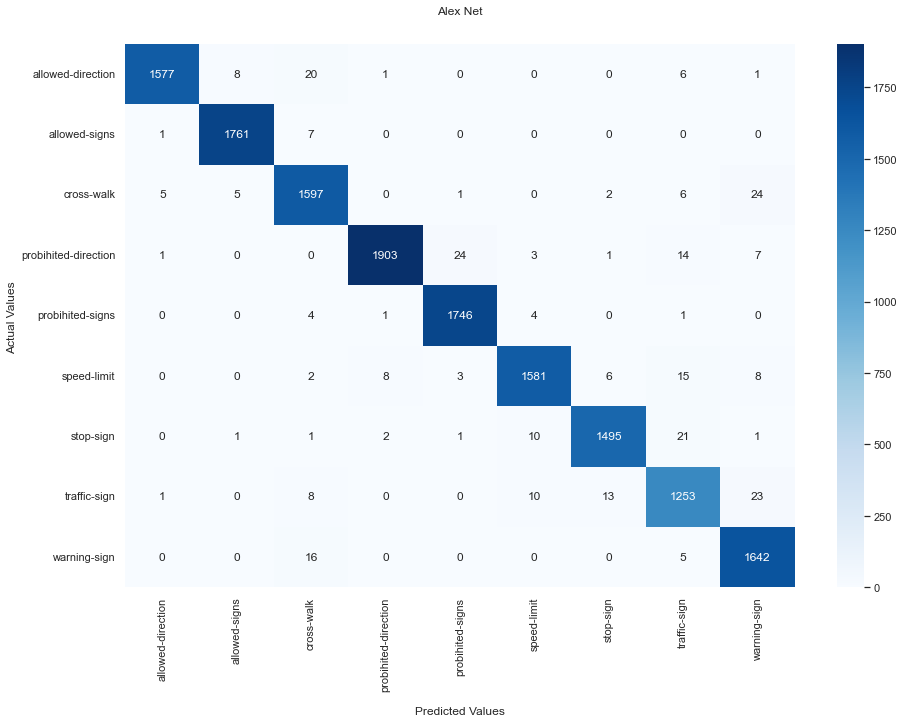

In [18]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns

def conf_mat(y , model, title ):
    actual_y = [ np.argmax(i) for i in y]
    preds_y =  [ np.argmax(i) for i in model.predict(X)] 
    conf_mat = confusion_matrix(actual_y , preds_y)

    # sns.set( font_scale=1.5)
    plt.figure(figsize=(15,10))
    df_cm = pd.DataFrame(conf_mat, CATEGORIES,  CATEGORIES)
    sns.set(font_scale=1)
    ax = sns.heatmap(df_cm , annot=True, cmap='Blues', fmt='g')
    ax.set_ylabel('Actual Values ');
    ax.set_xlabel('\nPredicted Values')
    ax.set_title(f'{title}\n\n');
    # print(conf_mat)

conf_mat(y, alex_net_model,'Alex Net' )

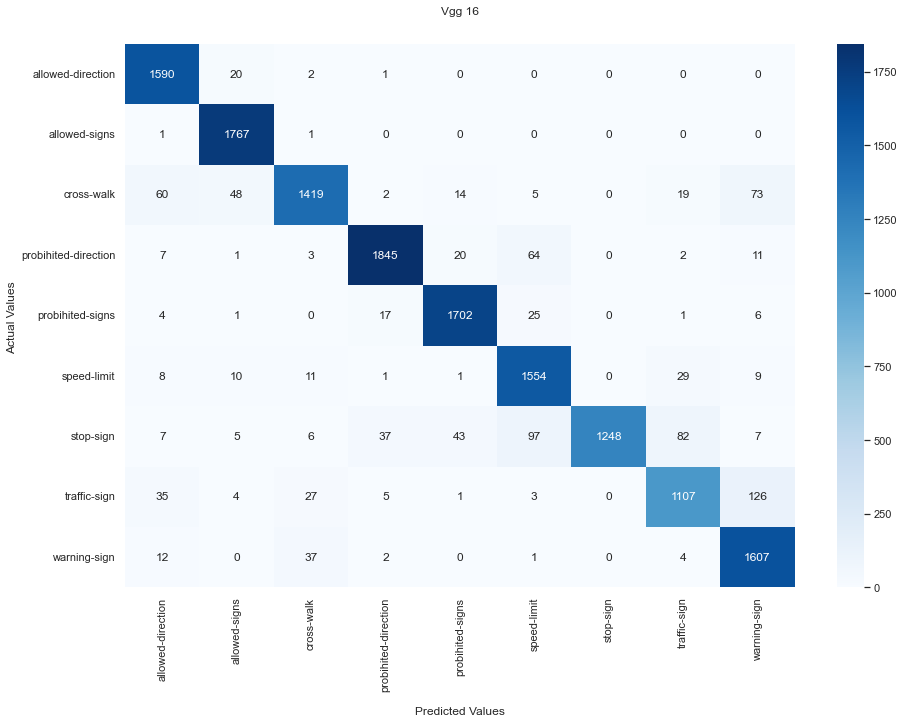

In [19]:
conf_mat(y, vgg_model,'Vgg 16' )

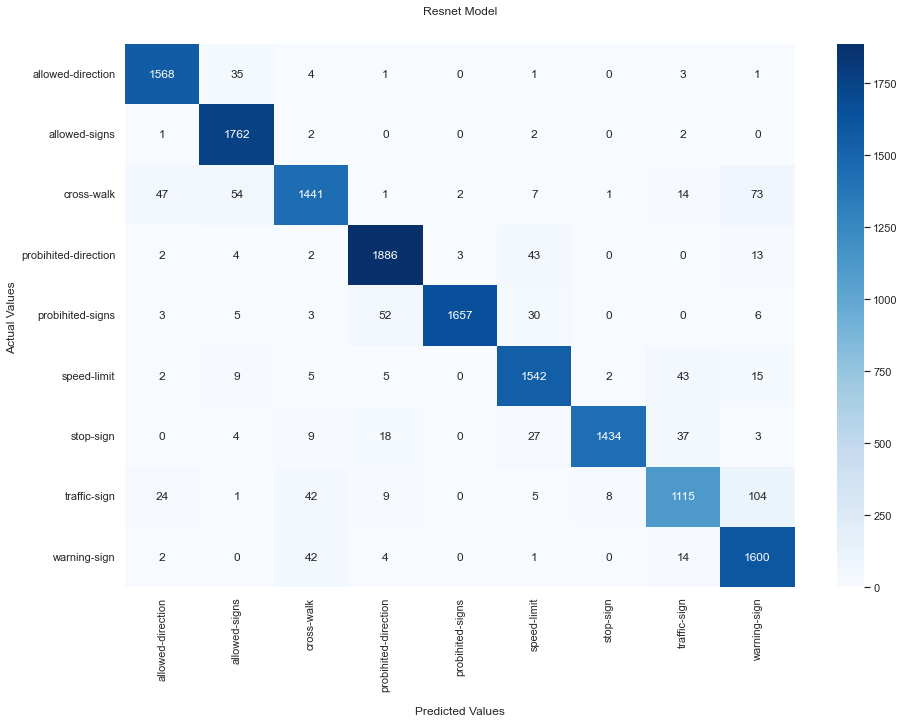

In [20]:
conf_mat(y, resnet_model,'Resnet Model' )

In [22]:
from sklearn.metrics import classification_report

resnet_pred = resnet_model.predict(X)
vgg_pred = vgg_model.predict(X)
alex_net = alex_net_model.predict(X)

In [23]:
print('------------------- RESNET36 -------------------')
print(classification_report(np.argmax(y, axis=1) , np.argmax(resnet_pred, axis=1) , target_names=CATEGORIES))

------------------- RESNET36 -------------------
                      precision    recall  f1-score   support

   allowed-direction       0.95      0.97      0.96      1613
       allowed-signs       0.94      1.00      0.97      1769
          cross-walk       0.93      0.88      0.90      1640
probihited-direction       0.95      0.97      0.96      1953
    probihited-signs       1.00      0.94      0.97      1756
         speed-limit       0.93      0.95      0.94      1623
           stop-sign       0.99      0.94      0.96      1532
        traffic-sign       0.91      0.85      0.88      1308
        warning-sign       0.88      0.96      0.92      1663

            accuracy                           0.94     14857
           macro avg       0.94      0.94      0.94     14857
        weighted avg       0.94      0.94      0.94     14857



In [24]:
print('------------------- VGG16 -------------------')
print(classification_report(np.argmax(y, axis=1) , np.argmax(vgg_pred, axis=1) , target_names=CATEGORIES))

------------------- VGG16 -------------------
                      precision    recall  f1-score   support

   allowed-direction       0.92      0.99      0.95      1613
       allowed-signs       0.95      1.00      0.97      1769
          cross-walk       0.94      0.87      0.90      1640
probihited-direction       0.97      0.94      0.96      1953
    probihited-signs       0.96      0.97      0.96      1756
         speed-limit       0.89      0.96      0.92      1623
           stop-sign       1.00      0.81      0.90      1532
        traffic-sign       0.89      0.85      0.87      1308
        warning-sign       0.87      0.97      0.92      1663

            accuracy                           0.93     14857
           macro avg       0.93      0.93      0.93     14857
        weighted avg       0.93      0.93      0.93     14857



In [25]:
print('------------------- AlexNet -------------------')
print(classification_report(np.argmax(y, axis=1) , np.argmax(alex_net, axis=1) , target_names=CATEGORIES))

------------------- AlexNet -------------------
                      precision    recall  f1-score   support

   allowed-direction       0.99      0.98      0.99      1613
       allowed-signs       0.99      1.00      0.99      1769
          cross-walk       0.96      0.97      0.97      1640
probihited-direction       0.99      0.97      0.98      1953
    probihited-signs       0.98      0.99      0.99      1756
         speed-limit       0.98      0.97      0.98      1623
           stop-sign       0.99      0.98      0.98      1532
        traffic-sign       0.95      0.96      0.95      1308
        warning-sign       0.96      0.99      0.97      1663

            accuracy                           0.98     14857
           macro avg       0.98      0.98      0.98     14857
        weighted avg       0.98      0.98      0.98     14857



### Tanh vs Sigmoid Vs ReLU
# Alex Net Evaluation - Best Model

In [8]:
# alex_net = pd.read_csv('nihogalog_logs_alexnet.csv')
# resnet = pd.read_csv('nihogalog_logs_resnet.csv')
# vgg = pd.read_csv('nihogalog_logs_vgg16.csv')

# alex_net_model =  tf.keras.models.load_model('save-models/alexnet')
# vgg_model =  tf.keras.models.load_model('save-models/vgg16')
# resnet_model =  tf.keras.models.load_model('save-models/resnet50')
df_relu = pd.read_csv('nihogalog_logs_alexnet-relu.csv')
df_sigmoid = pd.read_csv('nihogalog_logs_alexnet-sigmoid.csv')
df_tanh = pd.read_csv('nihogalog_logs_alexnet-tanh.csv')

relu_model = tf.keras.models.load_model('save-models/alexnet')
sigmoid_model = tf.keras.models.load_model('save-models/alexnet-sigmoid')
tanh_model = tf.keras.models.load_model('save-models/alexnet-tanh')

In [6]:
df_relu.tail()

,epoch,accuracy,loss,val_accuracy,val_loss
40,40,0.972172,0.080598,0.963452,0.112375
41,41,0.972961,0.074555,0.952278,0.146642
42,42,0.975922,0.068680,0.949182,0.153015
43,43,0.973784,0.076539,0.955038,0.139527
44,44,0.975692,0.069378,0.946221,0.163374


In [7]:
df_sigmoid.tail()

,epoch,accuracy,loss,val_accuracy,val_loss
95,95,0.987533,0.038769,0.980817,0.061075
96,96,0.989342,0.032180,0.976442,0.074444
97,97,0.989342,0.031443,0.976644,0.075884
98,98,0.988750,0.032809,0.979404,0.069843
99,99,0.990395,0.030519,0.977721,0.072824


In [10]:
df_tanh.tail()

,epoch,accuracy,loss,val_accuracy,val_loss
48,48,0.982237,0.051215,0.970452,0.093351
49,49,0.981580,0.052928,0.950461,0.171023
50,50,0.982797,0.050796,0.967827,0.102307
51,51,0.981777,0.053709,0.969846,0.091507
52,52,0.981909,0.054863,0.949384,0.156610


(0.0, 1.0)

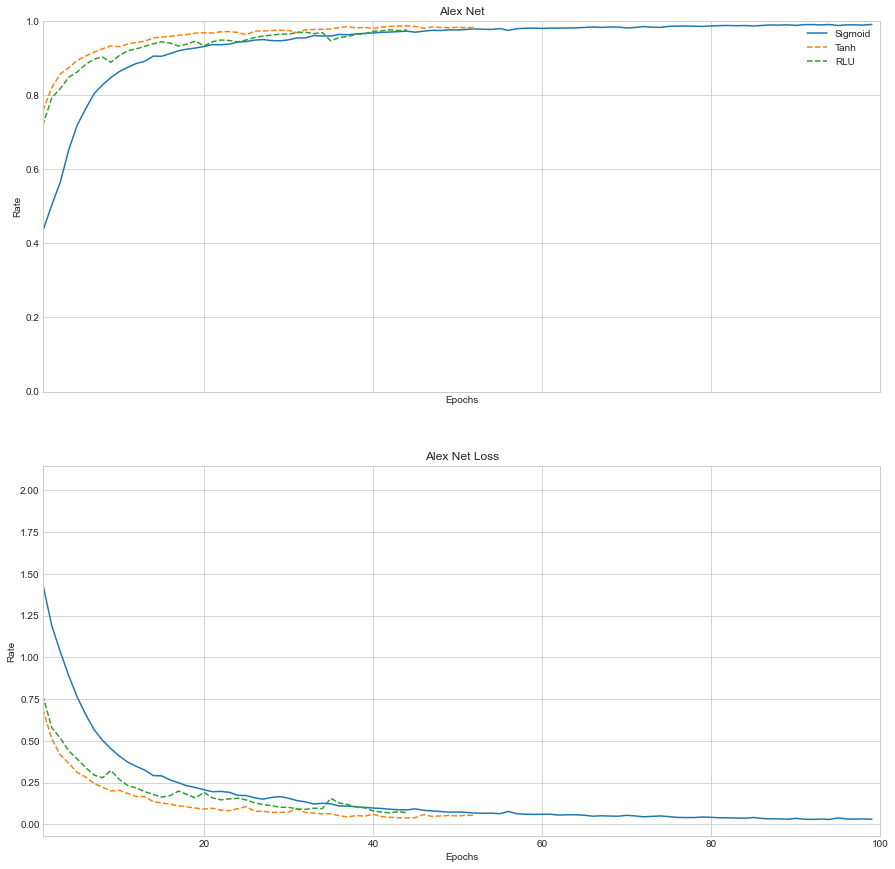

In [55]:
plt.style.use('seaborn-whitegrid')
fig, (ax0, ax1) = plt.subplots( nrows=2, ncols=1, figsize=(15,15) , sharex=True)


ax0.plot(df_sigmoid['accuracy'])
ax0.plot(df_tanh['accuracy'], linestyle='--',)
ax0.plot(df_relu['accuracy'], linestyle='--')
ax0.set(
    title='Alex Net',
    xlabel='Epochs',
    ylabel='Rate',
)
ax0.legend([ 'Sigmoid', 'Tanh' ,'RLU'])


ax1.plot(df_sigmoid['loss'])
ax1.plot(df_tanh['loss'], linestyle='--')
ax1.plot(df_relu['loss'], linestyle='--')
ax1.set(
    title='Alex Net Loss',
    xlabel='Epochs',
    ylabel='Rate',
)
ax0.legend([ 'Sigmoid', 'Tanh' ,'RLU'])



ax0.set_xlim([1, 100])
ax0.set_ylim([0, 1])

In [32]:

%timeit (relu_model.evaluate(X,y))

465/465 [==============================] - 4s 7ms/step - loss: 0.1613 - accuracy: 0.9466
4.05 s ± 153 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
%timeit (sigmoid_model.evaluate(X,y))   

465/465 [==============================] - 4s 8ms/step - loss: 0.0878 - accuracy: 0.9718
4.11 s ± 149 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%timeit (tanh_model.evaluate(X,y))

465/465 [==============================] - 4s 7ms/step - loss: 0.1524 - accuracy: 0.9497
3.94 s ± 202 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
sigmoid_model = tf.keras.models.load_model('save-models/alexnet-sigmoid')

In [26]:
sigmoid_model = tf.keras.models.load_model('save-models/alexnet-sigmoid-final')
sigmoid_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 20, 20, 96)        34944     
                                                                 
 batch_normalization_10 (Bat  (None, 20, 20, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 9, 9, 96)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 256)         614656    
                                                                 
 batch_normalization_11 (Bat  (None, 9, 9, 256)        1024      
 chNormalization)                                                
                                                      